# Load Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
sns.set_style('dark')

In [37]:
from utils import to_img, plot_energy

In [4]:
cat = Image.open('images/cat1.jpeg').convert('L')
cat.save('images/cat1_gray.jpeg')
cat.size

(1350, 900)

In [5]:
plt.rcParams.update({'figure.figsize': (12, 8)})

[[200 200 200 ... 197 197 198]
 [200 200 200 ... 198 198 199]
 [200 200 200 ... 198 198 199]
 ...
 [208 206 204 ... 188 187 178]
 [204 207 205 ... 189 180 173]
 [202 205 204 ... 185 172 174]]


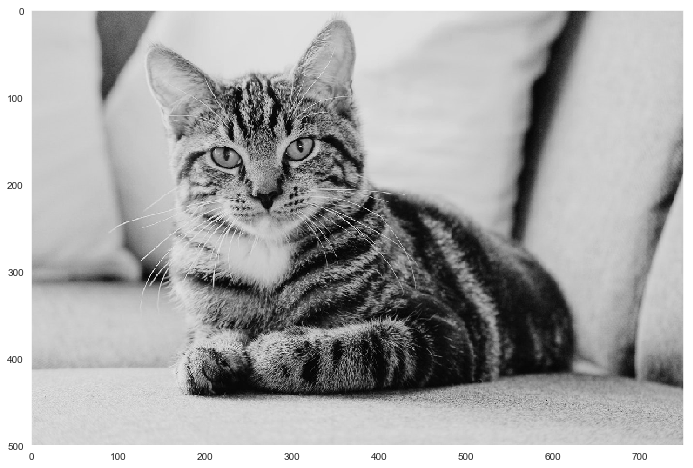

In [6]:
A = np.array(cat.resize([750, 500]))
print(A)
plt.imshow(A, cmap='gray')

[[0.78431373 0.78431373 0.78431373 ... 0.77254902 0.77254902 0.77647059]
 [0.78431373 0.78431373 0.78431373 ... 0.77647059 0.77647059 0.78039216]
 [0.78431373 0.78431373 0.78431373 ... 0.77647059 0.77647059 0.78039216]
 ...
 [0.81568627 0.80784314 0.8        ... 0.7372549  0.73333333 0.69803922]
 [0.8        0.81176471 0.80392157 ... 0.74117647 0.70588235 0.67843137]
 [0.79215686 0.80392157 0.8        ... 0.7254902  0.6745098  0.68235294]]


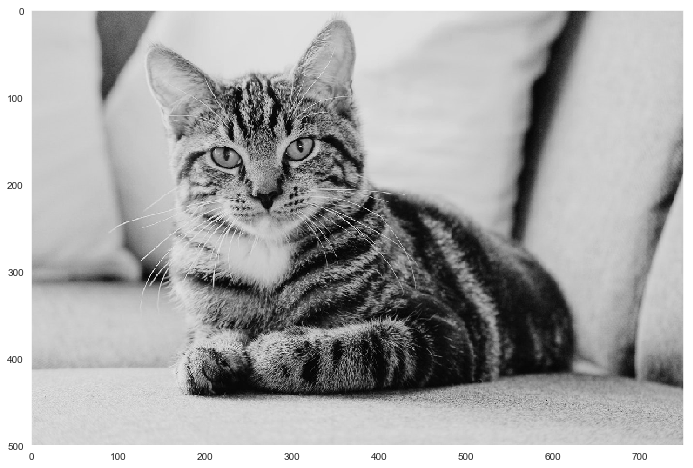

In [7]:
B = A/255
print(B)
plt.imshow(B, cmap='gray')
to_img(B).save('images/cat1_small.jpeg')

# Inpainting

## Mask

In [35]:
%run inpainting.py

In [38]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

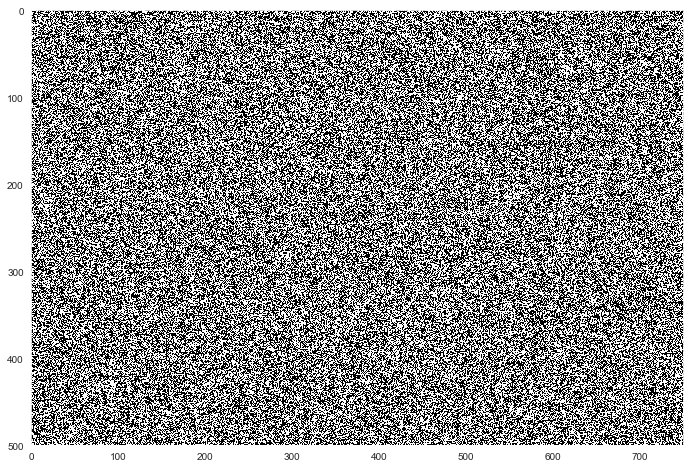

In [39]:
M = generate_mask(B.shape)
plt.imshow(M, cmap='gray')

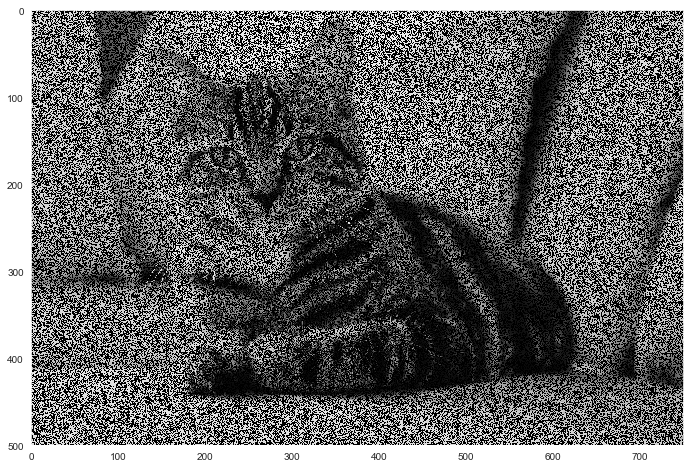

In [40]:
Bm = M * B
plt.imshow(Bm, cmap='gray')

In [49]:
cat_masked = to_img(Bm)
cat_masked.save('images/cat1_masked.jpeg')

## FB

In [41]:
inp_fb = Inpainting(Bm, M)

In [42]:
inp_fb.run(100, 0.1, 0.02, 'db4')

tensor([[0.8272, 0.7887, 0.7649,  ..., 0.7470, 0.6448, 0.7874],
        [0.7681, 0.5924, 0.5534,  ..., 0.6945, 0.6774, 0.6295],
        [0.7814, 0.7914, 0.7704,  ..., 0.6254, 0.6184, 0.7648],
        ...,
        [0.8165, 0.7670, 0.5589,  ..., 0.7245, 0.3265, 0.3697],
        [0.7672, 0.7887, 0.7920,  ..., 0.7180, 0.4248, 0.6695],
        [0.7918, 0.7941, 0.7898,  ..., 0.7087, 0.7114, 0.6848]],
       device='cuda:0', requires_grad=True)

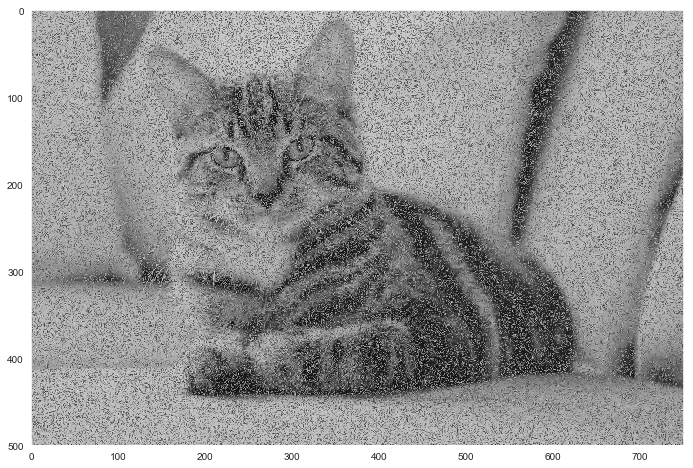

In [43]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fb.x.cpu().detach(), cmap='gray')

## FISTA

In [44]:
alpha_c = fista.AlphaClassic()
alpha2 = fista.Alpha(2)
alpha3 = fista.Alpha(3)
alpha4 = fista.Alpha(4)

In [45]:
inp_fista = Inpainting(Bm, M)
inp_fista.run(100, 0.1, 0.02, 'db4', alpha=alpha_c)

tensor([[0.7851, 0.7852, 0.7852,  ..., 0.7648, 0.7673, 0.7771],
        [0.7852, 0.7852, 0.7852,  ..., 0.7752, 0.7660, 0.7432],
        [0.7853, 0.7853, 0.7853,  ..., 0.7796, 0.7721, 0.7495],
        ...,
        [0.8010, 0.8008, 0.8006,  ..., 0.7282, 0.7167, 0.6918],
        [0.8005, 0.8003, 0.8002,  ..., 0.7143, 0.6791, 0.6635],
        [0.8004, 0.8002, 0.8002,  ..., 0.6980, 0.6039, 0.5763]],
       device='cuda:0', requires_grad=True)

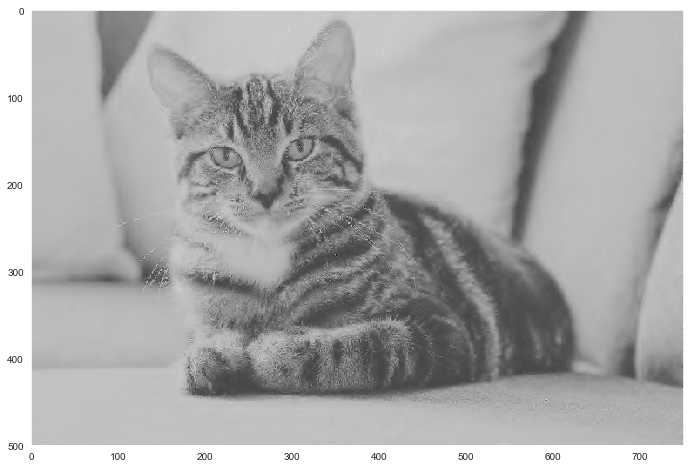

In [46]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista.x.cpu().detach(), cmap='gray')

In [58]:
inp_fista_a2 = Inpainting(Bm, M)
inp_fista_a2.run(100, 0.1, 0.02, 'db4', alpha=alpha2)

tensor([[0.7842, 0.7842, 0.7842,  ..., 0.8244, 0.8000, 0.7827],
        [0.7842, 0.7842, 0.7842,  ..., 0.7786, 0.7751, 0.7728],
        [0.7843, 0.7843, 0.7843,  ..., 0.7826, 0.7680, 0.6644],
        ...,
        [0.8011, 0.8009, 0.8007,  ..., 0.7571, 0.7421, 0.7055],
        [0.8007, 0.8004, 0.8002,  ..., 0.7154, 0.7054, 0.6957],
        [0.8003, 0.7999, 0.7997,  ..., 0.5562, 0.6205, 0.6939]],
       device='cuda:0', requires_grad=True)

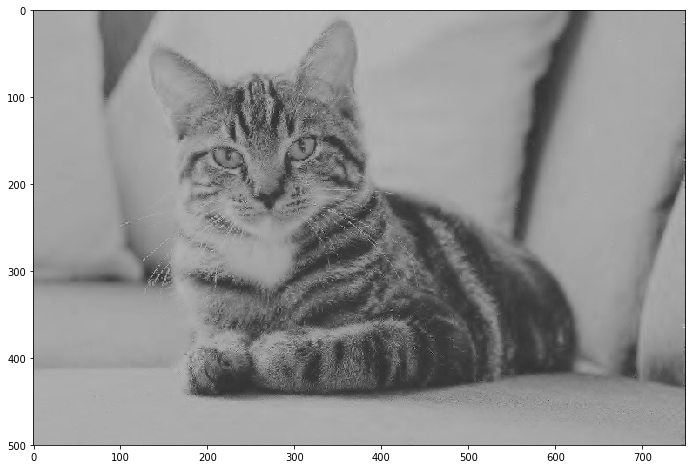

In [59]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista_a2.x.cpu().detach(), cmap='gray')

In [52]:
inp_fista_a3 = Inpainting(Bm, M)
inp_fista_a3.run(100, 0.1, 0.02, 'db4', alpha=alpha3)

tensor([[0.7867, 0.7868, 0.7868,  ..., 0.7058, 0.7215, 0.8023],
        [0.7868, 0.7868, 0.7869,  ..., 0.7467, 0.7903, 0.7855],
        [0.7869, 0.7869, 0.7869,  ..., 0.7687, 0.7294, 0.4330],
        ...,
        [0.8000, 0.7999, 0.7999,  ..., 0.7545, 0.7345, 0.7064],
        [0.7997, 0.7995, 0.7996,  ..., 0.7164, 0.7189, 0.6692],
        [0.7996, 0.7993, 0.7995,  ..., 0.5094, 0.6448, 0.6967]],
       device='cuda:0', requires_grad=True)

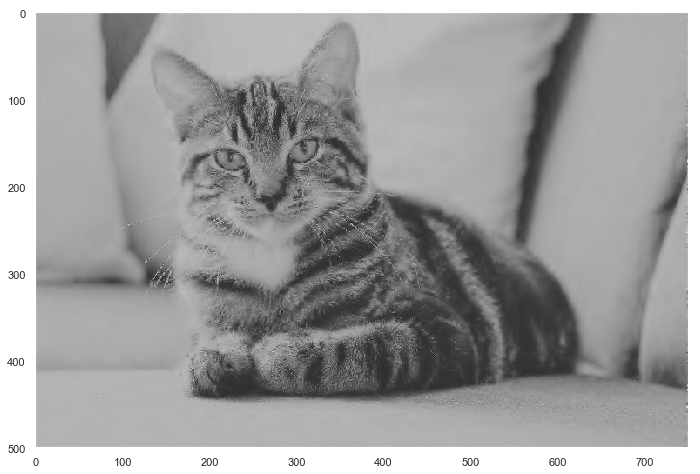

In [83]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista_a3.x.cpu().detach(), cmap='gray')

In [61]:
inp_fista_a4 = Inpainting(Bm, M)
inp_fista_a4.run(100, 0.1, 0.02, 'db4', alpha=alpha4)

tensor([[0.7917, 0.7917, 0.7918,  ..., 0.7689, 0.7716, 0.7836],
        [0.7919, 0.7919, 0.7919,  ..., 0.7682, 0.7652, 0.7618],
        [0.7920, 0.7920, 0.7920,  ..., 0.7684, 0.7645, 0.7585],
        ...,
        [0.8019, 0.8017, 0.8043,  ..., 0.7492, 0.7288, 0.6988],
        [0.8032, 0.8030, 0.8044,  ..., 0.7161, 0.7090, 0.6920],
        [0.8086, 0.8084, 0.8061,  ..., 0.6028, 0.6534, 0.6900]],
       device='cuda:0', requires_grad=True)

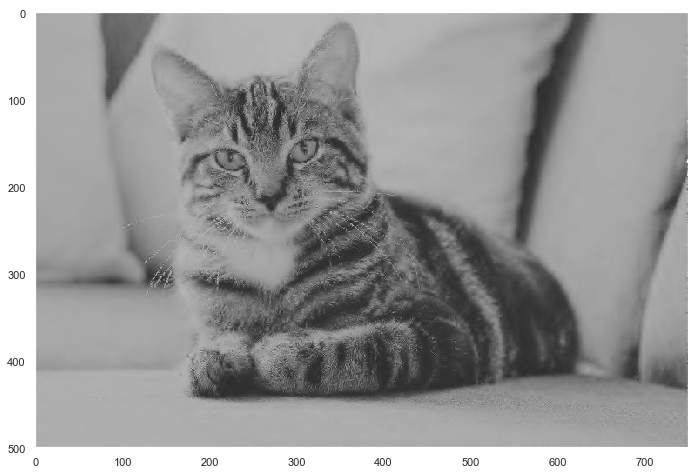

In [80]:
plt.figure(figsize=(12, 8))
plt.imshow(inp_fista_a4.x.cpu().detach(), cmap='gray')

## Comparison

In [106]:
sns.set()
sns.set(font_scale=1.6)
# plt.rcParams.update({'figure.figsize': (8, 6)})
# plt.rcParams.update({'font.size': 16})

In [128]:
min_energy = np.min(
    np.r_[inp_fb.energies, inp_fista.energies, inp_fista_a2.
          energies, inp_fista_a3.energies, inp_fista_a4.energies])
print(min_energy)

388.6807078552246


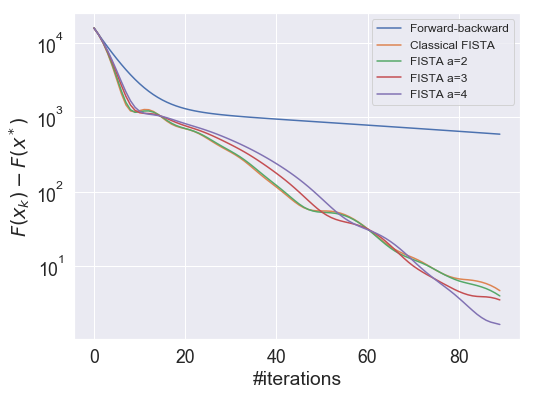

In [132]:
plot_energy(inp_fb.energies, min_energy, 90, label='Forward-backward')
plot_energy(inp_fista.energies, min_energy, 90, label='Classical FISTA')
plot_energy(inp_fista_a2.energies, min_energy, 90, label='FISTA a=2')
plot_energy(inp_fista_a3.energies, min_energy, 90, label='FISTA a=3')
plot_energy(inp_fista_a4.energies, min_energy, 90, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$F(x_k)-F(x^*)$')
plt.yscale('log')
plt.legend(prop={'size': 12})

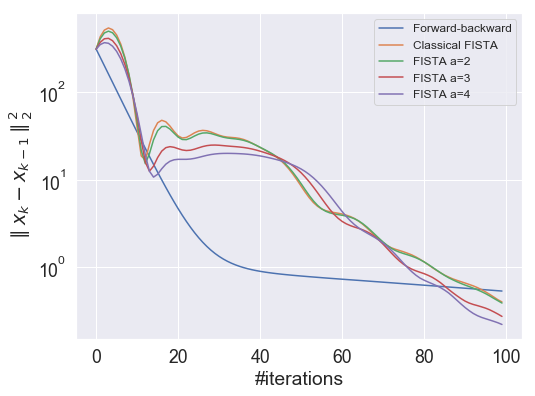

In [134]:
plt.plot(inp_fb.x_diffs[:100], label='Forward-backward')
plt.plot(inp_fista.x_diffs, label='Classical FISTA')
plt.plot(inp_fista_a2.x_diffs, label='FISTA a=2')
plt.plot(inp_fista_a3.x_diffs, label='FISTA a=3')
plt.plot(inp_fista_a4.x_diffs, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$\parallel x_k-x_{k-1}\parallel_2^2$')
plt.yscale('log')
plt.legend(prop={'size': 12})

In [48]:
to_img(inp_fb.x.cpu().detach().numpy()).save('images/cat1_inpainting_fb_100.jpeg')
to_img(inp_fista.x.cpu().detach().numpy()).save('images/cat1_inpainting_fista.jpeg')

In [53]:
inp_fb.run(100, 0.1, 0.02, 'db4')
to_img(inp_fb.x.cpu().detach().numpy()).save('images/cat1_inpainting_fb_500.jpeg')

# Deblurring

## Blurring

In [8]:
%run deblurring.py

In [9]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

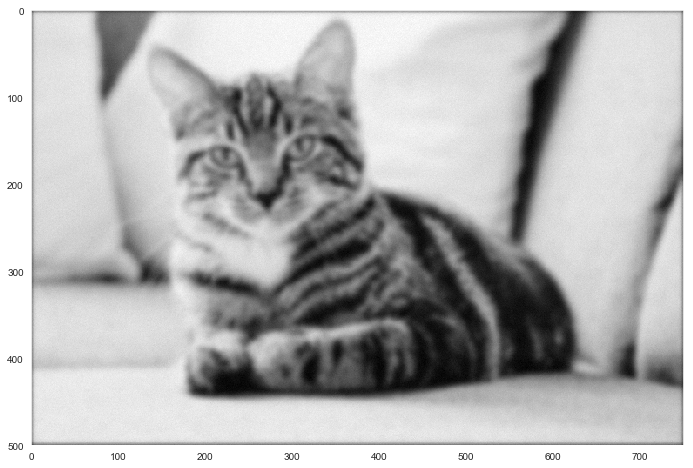

In [10]:
blurring = GaussianSmoothing(19, 3)
Bb = blurring(torch.tensor(B, dtype=torch.float))
Bbn = Bb.numpy() + np.random.randn(*B.shape)*0.01
plt.imshow(Bbn, cmap='gray')

In [54]:
cat_blurred = to_img(Bbn)
cat_blurred.save('images/cat1_blurred.jpeg')

## FB

In [55]:
deblurring_fb = Deblurring(Bbn, 19, 3)

In [58]:
deblurring_fb.run(100, 1, 0.005, 'db6')

tensor([[0.8483, 0.8658, 0.8446,  ..., 0.9425, 0.7508, 0.8016],
        [0.4623, 0.6531, 0.9319,  ..., 0.8473, 0.7449, 0.7657],
        [0.9339, 0.8452, 0.7168,  ..., 0.7014, 0.7418, 0.7133],
        ...,
        [0.7835, 0.8298, 0.7781,  ..., 0.7183, 0.7201, 0.7200],
        [0.8181, 0.7644, 0.8204,  ..., 0.7279, 0.7322, 0.7332],
        [0.8327, 0.7385, 0.8375,  ..., 0.7356, 0.7417, 0.7434]],
       device='cuda:0', requires_grad=True)

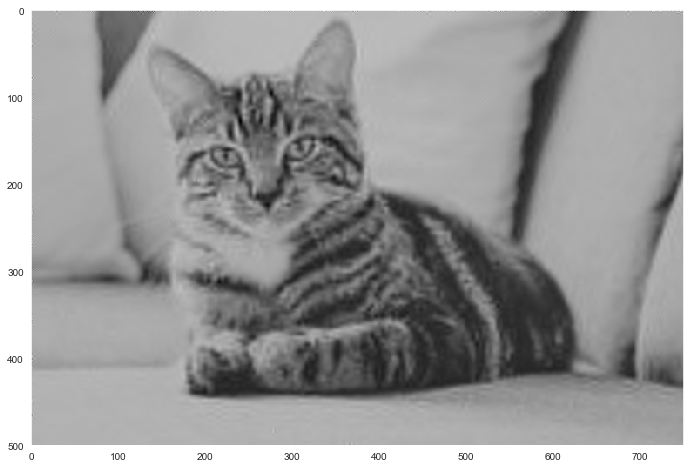

In [59]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fb.x.cpu().detach(), cmap='gray')

## FISTA

In [83]:
alpha_c = fista.AlphaClassic()
alpha2 = fista.Alpha(2)
alpha3 = fista.Alpha(3)
alpha4 = fista.Alpha(4)

In [60]:
deblurring_fista = Deblurring(Bbn, 19, 3)
deblurring_fista.run(100, 1, 0.005, 'db6', alpha=alpha_c)

tensor([[1.0633, 0.9201, 0.6942,  ..., 0.6632, 0.8693, 0.7271],
        [0.2651, 0.5313, 0.9578,  ..., 0.7217, 0.8208, 0.7524],
        [1.1142, 0.9492, 0.6808,  ..., 0.8123, 0.7455, 0.7920],
        ...,
        [0.7974, 0.7975, 0.7978,  ..., 0.7154, 0.7164, 0.7169],
        [0.7975, 0.7977, 0.7979,  ..., 0.7138, 0.7144, 0.7145],
        [0.7977, 0.7979, 0.7981,  ..., 0.7129, 0.7130, 0.7127]],
       device='cuda:0', requires_grad=True)

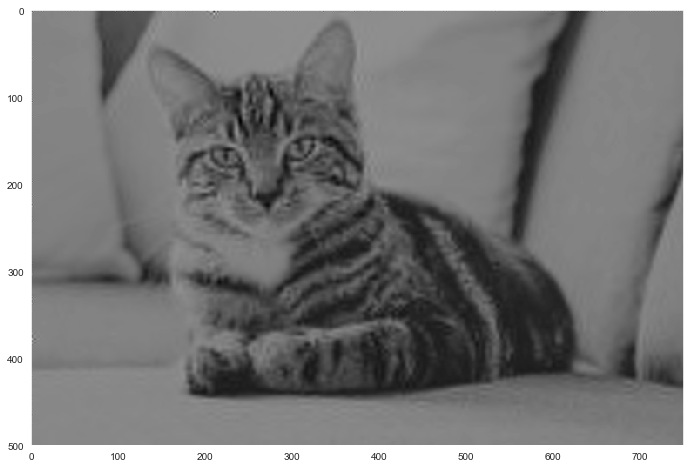

In [61]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista.x.cpu().detach(), cmap='gray')

In [118]:
deblurring_fista_a2 = Deblurring(Bbn, 19, 3)
deblurring_fista_a2.run(100, 1, 0.005, 'db6', alpha=alpha2)

tensor([[0.9494, 0.3124, 1.0271,  ..., 0.9048, 0.6423, 0.8343],
        [0.9018, 0.5783, 0.9075,  ..., 0.8354, 0.7082, 0.8008],
        [0.8128, 0.9944, 0.7139,  ..., 0.7267, 0.8115, 0.7477],
        ...,
        [0.7962, 0.7964, 0.7967,  ..., 0.7153, 0.7124, 0.7105],
        [0.7973, 0.7976, 0.7979,  ..., 0.7247, 0.7226, 0.7212],
        [0.7983, 0.7986, 0.7989,  ..., 0.7315, 0.7298, 0.7287]],
       device='cuda:0', requires_grad=True)

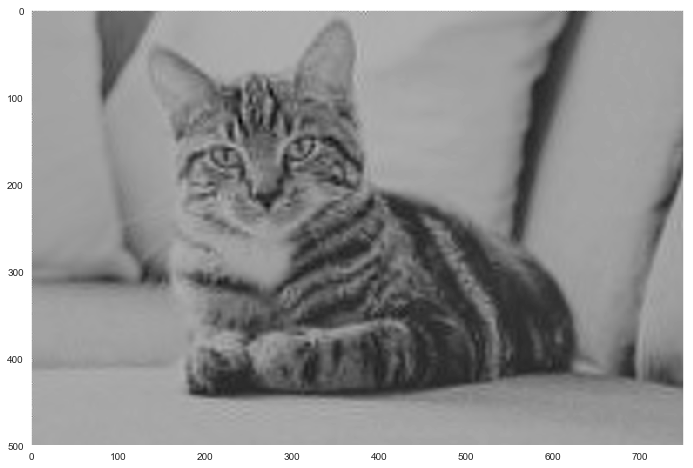

In [119]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista_a2.x.cpu().detach(), cmap='gray')

In [116]:
deblurring_fista_a3 = Deblurring(Bbn, 19, 3)
deblurring_fista_a3.run(100, 1, 0.005, 'db6', alpha=alpha3)

tensor([[0.7996, 0.7442, 0.7106,  ..., 0.7698, 0.7690, 0.7683],
        [0.8162, 0.7765, 0.7415,  ..., 0.7700, 0.7693, 0.7685],
        [0.8236, 0.8188, 0.7944,  ..., 0.7703, 0.7696, 0.7688],
        ...,
        [0.7557, 0.7767, 0.8097,  ..., 0.7164, 0.7141, 0.7125],
        [0.7888, 0.7930, 0.7994,  ..., 0.7259, 0.7247, 0.7239],
        [0.8208, 0.8085, 0.7895,  ..., 0.7327, 0.7323, 0.7319]],
       device='cuda:0', requires_grad=True)

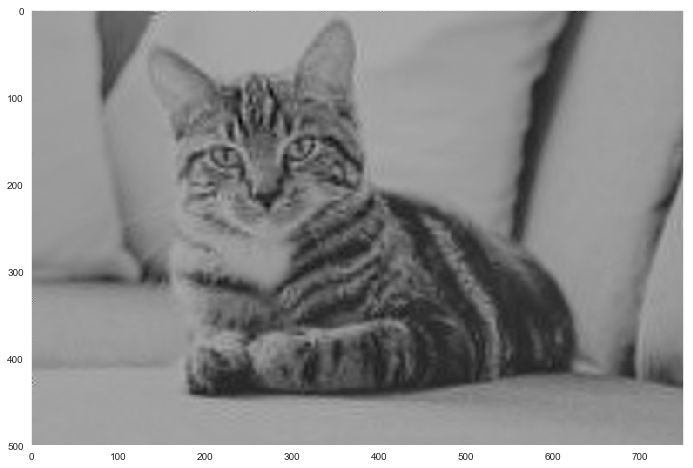

In [117]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista_a3.x.cpu().detach(), cmap='gray')

In [114]:
deblurring_fista_a4 = Deblurring(Bbn, 19, 3)
deblurring_fista_a4.run(100, 1, 0.005, 'db6', alpha=alpha4)

tensor([[0.9853, 0.2850, 1.0955,  ..., 0.7698, 0.7690, 0.7683],
        [0.9483, 0.5719, 0.9156,  ..., 0.7700, 0.7693, 0.7685],
        [0.8054, 0.9897, 0.6523,  ..., 0.7703, 0.7696, 0.7688],
        ...,
        [0.7974, 0.7976, 0.7978,  ..., 0.7175, 0.7155, 0.7142],
        [0.7984, 0.7986, 0.7988,  ..., 0.7278, 0.7268, 0.7261],
        [0.7992, 0.7994, 0.7997,  ..., 0.7352, 0.7348, 0.7345]],
       device='cuda:0', requires_grad=True)

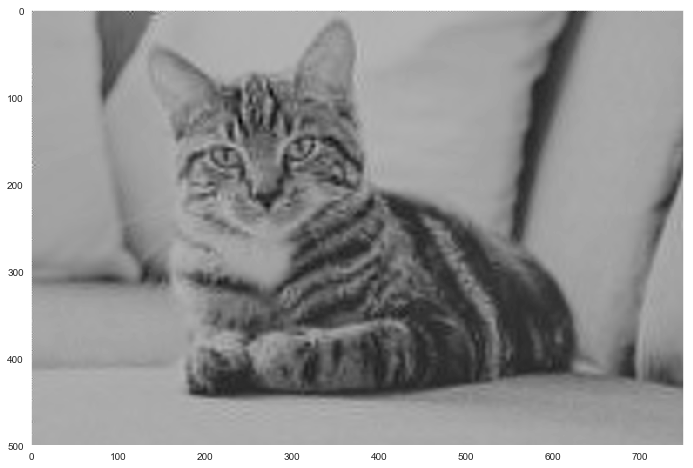

In [115]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista_a4.x.cpu().detach(), cmap='gray')

## Comparison

In [136]:
sns.set()
sns.set(font_scale=1.6)
# plt.rcParams.update({'figure.figsize': (8, 6)})
# plt.rcParams.update({'font.size': 16})

In [128]:
min_energy = np.min(
    np.r_[deblurring_fb.energies, deblurring_fista.
          energies, deblurring_fista_a2.energies, deblurring_fista_a3.
          energies, deblurring_fista_a4.energies])
print(min_energy)

135.84942301750183


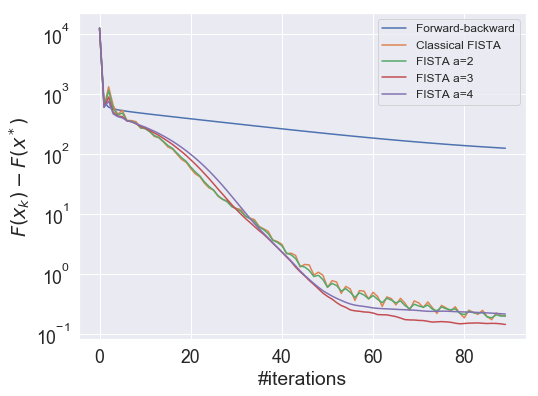

In [139]:
plt.figure(figsize=(8, 6))
plot_energy(deblurring_fb.energies, min_energy, 90, label='Forward-backward')
plot_energy(deblurring_fista.energies, min_energy, 90, label='Classical FISTA')
plot_energy(deblurring_fista_a2.energies, min_energy, 90, label='FISTA a=2')
plot_energy(deblurring_fista_a3.energies, min_energy, 90, label='FISTA a=3')
plot_energy(deblurring_fista_a4.energies, min_energy, 90, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$F(x_k)-F(x^*)$')
plt.yscale('log')
plt.legend(prop={'size': 12})

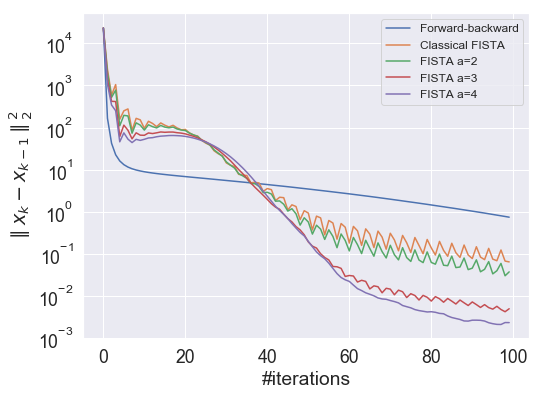

In [140]:
plt.figure(figsize=(8, 6))
plt.plot(deblurring_fb.x_diffs[:100], label='Forward-backward')
plt.plot(deblurring_fista.x_diffs, label='Classical FISTA')
plt.plot(deblurring_fista_a2.x_diffs, label='FISTA a=2')
plt.plot(deblurring_fista_a3.x_diffs, label='FISTA a=3')
plt.plot(deblurring_fista_a4.x_diffs, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$\parallel x_k-x_{k-1}\parallel_2^2$')
plt.yscale('log')
plt.legend(prop={'size': 12})

In [62]:
to_img(deblurring_fb.x.cpu().detach().numpy()).save('images/cat1_deblurring_fb_100.jpeg')
to_img(deblurring_fista.x.cpu().detach().numpy()).save('images/cat1_deblurring_fista.jpeg')

## Hyperparameters

In [12]:
alpha4 = fista.Alpha(4)

### Wavelets

In [84]:
deblurring_fista = Deblurring(Bbn, 19, 3)
deblurring_fista.run(100, 1, 0.005, 'db18', alpha=alpha4)

tensor([[ 0.7784,  0.7792,  0.7807,  ...,  0.8722,  0.5022,  0.0820],
        [ 0.7787,  0.7795,  0.7809,  ...,  0.8064,  0.3813, -0.0769],
        [ 0.7794,  0.7801,  0.7815,  ...,  0.7932,  0.5045,  0.1945],
        ...,
        [ 0.8044,  0.8042,  0.8039,  ..., -0.3149,  0.4695,  1.7263],
        [ 0.8056,  0.8052,  0.8046,  ..., -0.3193,  0.5084,  1.8220],
        [ 0.8061,  0.8057,  0.8049,  ..., -0.2180,  0.5670,  1.8003]],
       device='cuda:0', requires_grad=True)

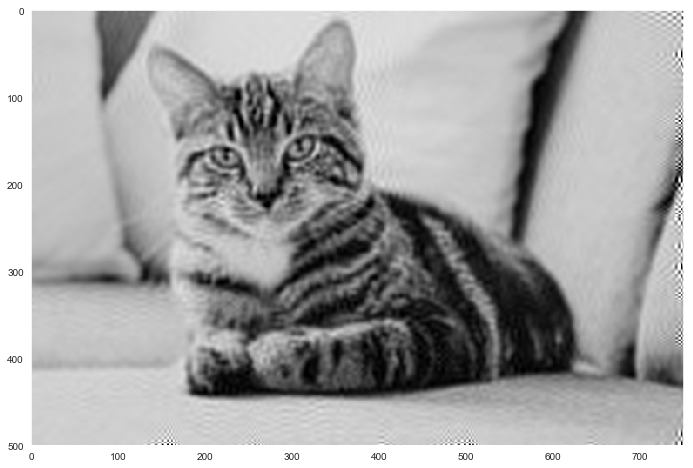

In [85]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista.x.cpu().detach(), cmap='gray', vmin=0, vmax=1)

In [86]:
to_img(deblurring_fista.x.cpu().detach().numpy()).save('images/cat1_deblurring_fista_db18.jpeg')

### $\lambda$

In [93]:
deblurring_fista = Deblurring(Bbn, 19, 3)
deblurring_fista.run(100, 1, 0.0005, 'db6', alpha=alpha4)

tensor([[0.6704, 0.8538, 0.8508,  ..., 0.6640, 0.7095, 0.6194],
        [0.6679, 0.8279, 0.8500,  ..., 0.9041, 0.6251, 0.7090],
        [0.6799, 0.7478, 0.7398,  ..., 0.6624, 0.8155, 0.7395],
        ...,
        [0.6491, 0.7807, 0.7586,  ..., 0.7474, 0.6891, 0.7351],
        [0.8004, 0.7150, 0.8082,  ..., 0.7088, 0.7719, 0.7472],
        [0.8284, 0.8350, 0.7509,  ..., 0.6953, 0.8124, 0.7624]],
       device='cuda:0', requires_grad=True)

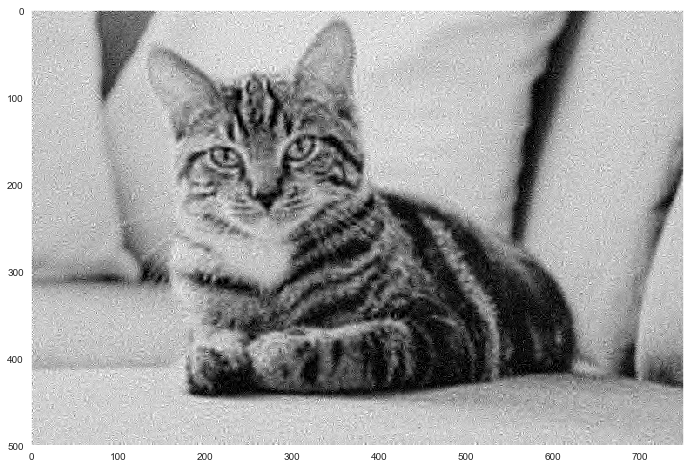

In [94]:
plt.figure(figsize=(12, 8))
plt.imshow(deblurring_fista.x.cpu().detach(), cmap='gray', vmin=0, vmax=1)

In [95]:
to_img(deblurring_fista.x.cpu().detach().numpy()).save('images/cat1_deblurring_fista_lb00005.jpeg')

# TV Denoising

## Add noise

In [63]:
%run tv_denoising.py

In [15]:
import importlib
importlib.reload(proximal)
importlib.reload(fista)

<module 'fista' from '/media/yu-guan/DATA/works/ens/MVA/Courses/DataScience/project/src/fista.py'>

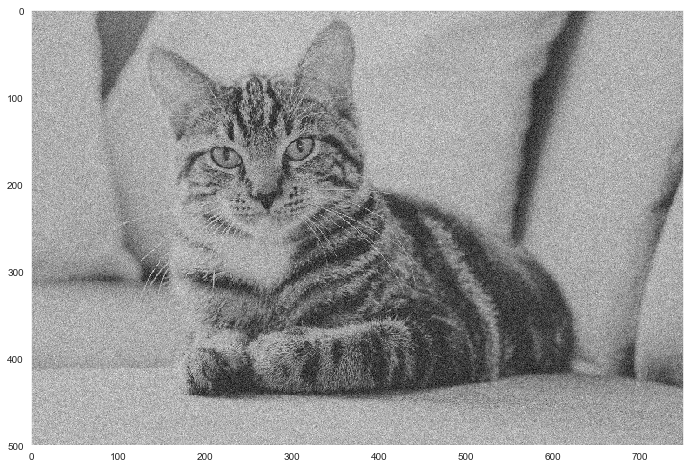

In [64]:
Bn = B + np.random.randn(*B.shape)*0.1
plt.imshow(Bn, cmap='gray')

In [65]:
cat_blurred = to_img(Bn)
cat_blurred.save('images/cat1_noisy.jpeg')

## FB

In [66]:
denoising_fb = TVDenoising(Bn)
denoising_fb.run(100, 0.1, 0.1)

tensor([[0.8128, 0.8113, 0.8085,  ..., 0.7797, 0.7758, 0.7736],
        [0.8119, 0.8104, 0.8075,  ..., 0.7782, 0.7743, 0.7719],
        [0.8104, 0.8088, 0.8058,  ..., 0.7752, 0.7715, 0.7690],
        ...,
        [0.7634, 0.7892, 0.7880,  ..., 0.6479, 0.6437, 0.6407],
        [0.7634, 0.7856, 0.7840,  ..., 0.6474, 0.6330, 0.6149],
        [0.7118, 0.7836, 0.7818,  ..., 0.5951, 0.5951, 0.5873]],
       device='cuda:0', grad_fn=<AddBackward0>)

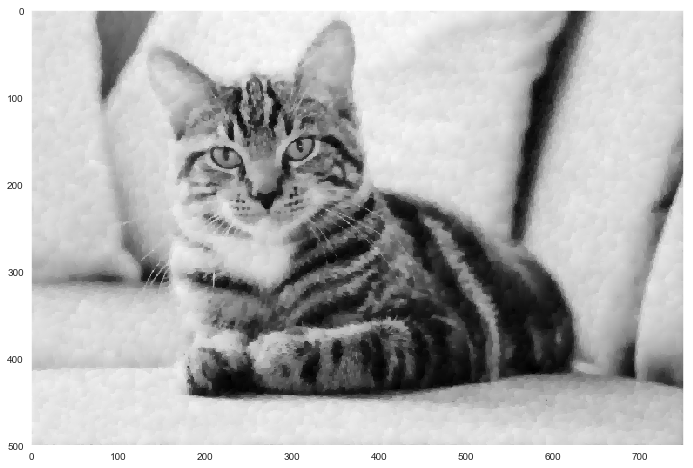

In [67]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fb.x.cpu().detach(), cmap='gray')

## FISTA

In [83]:
alpha_c = fista.AlphaClassic()
alpha2 = fista.Alpha(2)
alpha3 = fista.Alpha(3)
alpha4 = fista.Alpha(4)

In [68]:
denoising_fista = TVDenoising(Bn)
denoising_fista.run(100, 0.1, 0.1, alpha=alpha_c)

tensor([[0.7872, 0.7874, 0.7866,  ..., 0.7888, 0.7662, 0.7680],
        [0.7880, 0.7884, 0.7868,  ..., 0.7894, 0.7667, 0.7684],
        [0.7878, 0.7883, 0.7876,  ..., 0.7883, 0.7669, 0.7680],
        ...,
        [0.7634, 0.7923, 0.7932,  ..., 0.6728, 0.6571, 0.6566],
        [0.7633, 0.7940, 0.7919,  ..., 0.6719, 0.6330, 0.6149],
        [0.7118, 0.7928, 0.7932,  ..., 0.5948, 0.5955, 0.5873]],
       device='cuda:0', grad_fn=<AddBackward0>)

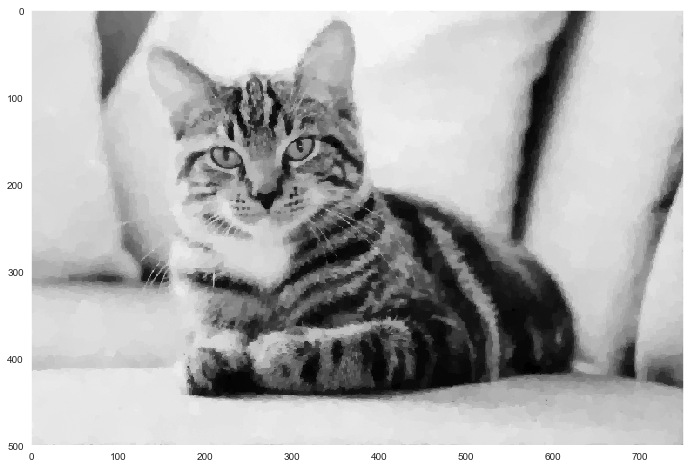

In [69]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista.x.cpu().detach(), cmap='gray')

In [216]:
denoising_fista_a2 = TVDenoising(Bn)
denoising_fista_a2.run(100, 0.1, 0.1, alpha=alpha2)

tensor([[0.7873, 0.7869, 0.7863,  ..., 0.7732, 0.7735, 0.7196],
        [0.7870, 0.7870, 0.7876,  ..., 0.7735, 0.7736, 0.7206],
        [0.7868, 0.7869, 0.7871,  ..., 0.7712, 0.7675, 0.7521],
        ...,
        [0.7729, 0.7739, 0.7739,  ..., 0.6970, 0.6980, 0.6918],
        [0.7737, 0.7729, 0.7732,  ..., 0.6283, 0.6274, 0.6259],
        [0.7731, 0.7728, 0.7727,  ..., 0.6270, 0.6269, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

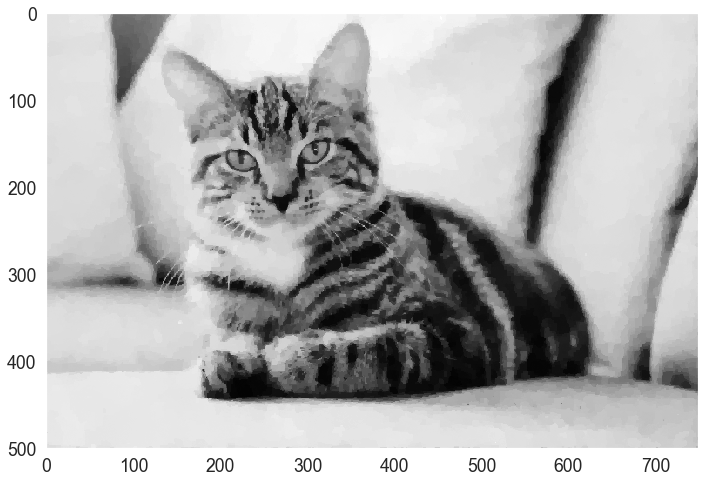

In [217]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista_a2.x.cpu().detach(), cmap='gray')

In [214]:
denoising_fista_a3 = TVDenoising(Bn)
denoising_fista_a3.run(100, 0.1, 0.1, alpha=alpha3)

tensor([[0.7859, 0.7859, 0.7862,  ..., 0.7741, 0.7721, 0.7201],
        [0.7860, 0.7857, 0.7859,  ..., 0.7734, 0.7723, 0.7201],
        [0.7859, 0.7855, 0.7858,  ..., 0.7712, 0.7678, 0.7530],
        ...,
        [0.7734, 0.7736, 0.7732,  ..., 0.6984, 0.6983, 0.6912],
        [0.7735, 0.7727, 0.7728,  ..., 0.6277, 0.6269, 0.6265],
        [0.7723, 0.7724, 0.7725,  ..., 0.6275, 0.6270, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

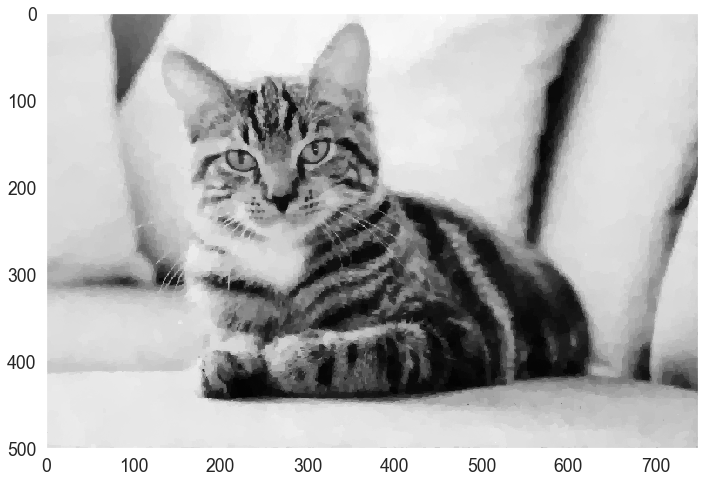

In [215]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista_a3.x.cpu().detach(), cmap='gray')

In [211]:
denoising_fista_a4 = TVDenoising(Bn)
denoising_fista_a4.run(100, 0.1, 0.1, alpha=alpha4)

tensor([[0.7873, 0.7875, 0.7873,  ..., 0.7728, 0.7725, 0.7200],
        [0.7875, 0.7873, 0.7872,  ..., 0.7730, 0.7726, 0.7202],
        [0.7871, 0.7874, 0.7868,  ..., 0.7712, 0.7662, 0.7551],
        ...,
        [0.7729, 0.7729, 0.7728,  ..., 0.6977, 0.6984, 0.6916],
        [0.7728, 0.7728, 0.7726,  ..., 0.6273, 0.6269, 0.6272],
        [0.7728, 0.7730, 0.7728,  ..., 0.6271, 0.6271, 0.6144]],
       device='cuda:0', grad_fn=<AddBackward0>)

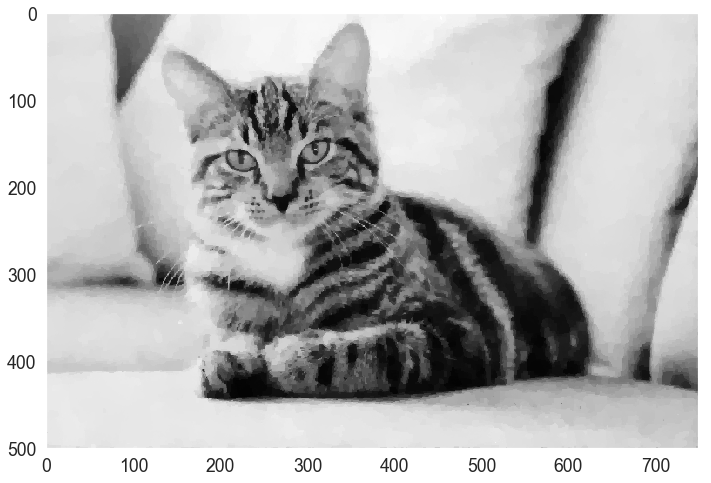

In [212]:
plt.figure(figsize=(12, 8))
plt.imshow(denoising_fista_a4.x.cpu().detach(), cmap='gray')

## Comparison

In [222]:
sns.set()
sns.set(font_scale=1.6)
# plt.rcParams.update({'figure.figsize': (8, 6)})
# plt.rcParams.update({'font.size': 16})

In [223]:
min_energy = np.min(
    np.r_[denoising_fb.energies, denoising_fista.energies, denoising_fista_a2.
          energies, denoising_fista_a3.energies, denoising_fista_a4.energies])
print(min_energy)

78292.28125


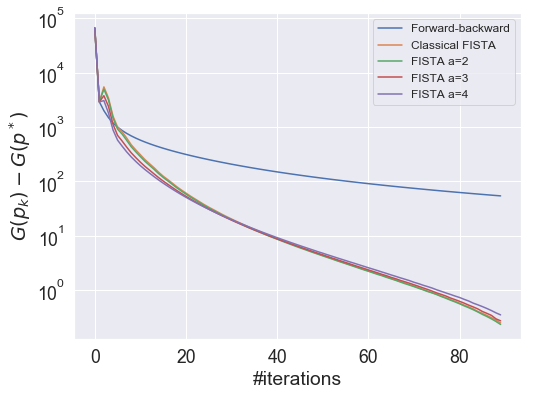

In [234]:
plt.figure(figsize=(8, 6))
plot_energy(denoising_fb.energies, min_energy, 90, label='Forward-backward')
plot_energy(denoising_fista.energies, min_energy, 90, label='Classical FISTA')
plot_energy(denoising_fista_a2.energies, min_energy, 90, label='FISTA a=2')
plot_energy(denoising_fista_a3.energies, min_energy, 90, label='FISTA a=3')
plot_energy(denoising_fista_a4.energies, min_energy, 90, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$G(p_k)-G(p^*)$')
plt.yscale('log')
plt.legend(prop={'size': 12})

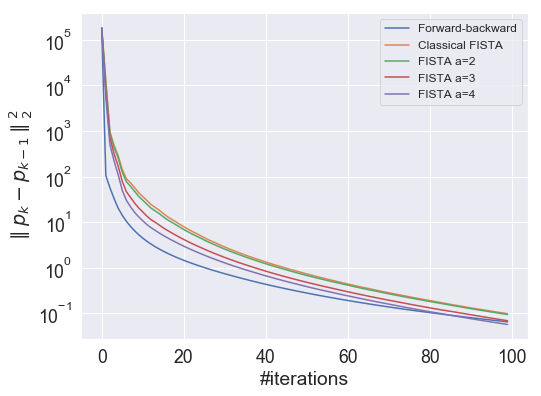

In [228]:
plt.figure(figsize=(8, 6))
plt.plot(denoising_fb.p_diffs[:100], label='Forward-backward')
plt.plot(denoising_fista.p_diffs, label='Classical FISTA')
plt.plot(denoising_fista_a2.p_diffs, label='FISTA a=2')
plt.plot(denoising_fista_a3.p_diffs, label='FISTA a=3')
plt.plot(denoising_fista_a4.p_diffs, label='FISTA a=4')

plt.xlabel('#iterations')
plt.ylabel(r'$\parallel p_k-p_{k-1}\parallel_2^2$')
plt.yscale('log')
plt.legend(prop={'size': 12})

In [70]:
to_img(denoising_fb.x.cpu().detach().numpy()).save('images/cat1_denoising_fb_100.jpeg')
to_img(denoising_fista.x.cpu().detach().numpy()).save('images/cat1_denoising_fista.jpeg')

In [74]:
denoising_fb.run(100, 0.1, 0.1)
to_img(denoising_fb.x.cpu().detach().numpy()).save('images/cat1_denoising_fb_500.jpeg')